<a href="https://colab.research.google.com/github/mhhussin/fileassingment1/blob/main/assingment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assingment 1**


---


Muhammad Hafiezul Hafizz Bin Hussin

unu2200034@student.unitar.my

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#**1. Import data in the dataset into pandas data frame and show the first 8 rows**

In [2]:

url='https://github.com/mhhussin/fileassingment1/raw/main/cereals.csv'
df = pd.read_csv(url)
print(df.head(8))

                 Cereal name Supplier Cold or Hot  ...  potass  vitamins     rating
0                  100%_Bran        N           C  ...   280.0        25  68.402973
1          100%_Natural_Bran        Q           C  ...   135.0         0  33.983679
2                   All-Bran        K           C  ...   320.0        25  59.425505
3  All-Bran_with_Extra_Fiber        K           C  ...   330.0        25  93.704912
4             Almond_Delight        R           C  ...     NaN        25  34.384843
5    Apple_Cinnamon_Cheerios        G           C  ...    70.0        25  29.509541
6                Apple_Jacks        K           C  ...    30.0        25  33.174094
7                    Basic_4        G           C  ...   100.0        25  37.038562

[8 rows x 13 columns]


#**2. Determine the number of record in the datasets**

In [ ]:
#method 1, using len()
print('The number of records in the dataset =',len(df))

The number of records in the dataset = 77


In [19]:
#method 2, using index and size
print('The number of records in the dataset =',df.index.size)

The number of records in the dataset = 77


#**3.Show the data type of the coloumns in the dataframe**

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cereal name  77 non-null     object 
 1   Supplier     77 non-null     object 
 2   Cold or Hot  77 non-null     object 
 3   calories     77 non-null     int64  
 4   protein      77 non-null     int64  
 5   fat          77 non-null     int64  
 6   sodium       77 non-null     int64  
 7   fiber        77 non-null     float64
 8   carbo        76 non-null     float64
 9   sugars       76 non-null     float64
 10  potass       75 non-null     float64
 11  vitamins     77 non-null     int64  
 12  rating       77 non-null     float64
dtypes: float64(5), int64(5), object(3)
memory usage: 7.9+ KB


#**4. Add a caculated column 'totalcarbo' which is the sum of carbo and sugar**

In [ ]:
df['totalcarbo']=df['carbo']+df['sugars']     #creating a new column called as totalcarbo
                                              #display of columns carbo,sugar and total carbo to verify the the operation runs correctly
df[['carbo','sugars','totalcarbo']].head(10)  #only display the first 10 elements     

#**5.Identify the number of 'cold' cereal in the dataframe'**

In [ ]:
cold_cereal= df[df['Cold or Hot']=='C']                 # selecting rows with C values for Cold or Hot columns
print('The number of cod cereal is =',len(cold_cereal)) # get the number of cold cereals in the dataframe

The number of cod cereal is = 74


#**6. Identify the number of suppliers in the datasets**

In [20]:
df_supplier=df.groupby('Supplier')['Supplier'].count() # group the dataset by supplier name
df_supplier                                            # then count the number supplier in the dataset


Supplier
A     1
G    22
K    23
N     6
P     9
Q     8
R     8
Name: Supplier, dtype: int64

In [21]:
num_of_supplier= df_supplier.index.size     #get the size from the number of records in df_supplier
                                            #store the number in num_of_supplier
                                            #another way we couuld use len(df_supplier) to get the number fo supplier
print('The number of supplier the the dataset =',num_of_supplier)

The number of supplier the the dataset = 7


#**7. Create another data frame containing all cereals whose 'carbo' is between 5 and 10 units inclusive**

In [ ]:
df_5To10_carbo=pd.DataFrame(df[(df['carbo']>=5) & (df['carbo']<=10)]) #creating new dataframe from the original df 
                                                                      #selecting only the record with the carbo value between 5 to 10
print('There are',df_5To10_carbo.index.size,'records with carbo between 5 to 10 inclusive\n')
df_5To10_carbo

There are 7 records with carbo between 5 to 10 inclusive



,Cereal name,Supplier,Cold or Hot,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,93.704912
19,Cracklin'_Oat_Bran,K,C,110,3,3,140,4.0,10.0,7.0,160.0,25,40.448772
55,Puffed_Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,50.0,0,63.005645
66,Smacks,K,C,110,2,1,70,1.0,9.0,15.0,40.0,25,31.230054


#**8.Create another dataframe containing the name, carbo, and sugar for cereals with 0 fat**

In [50]:
#method 1
df_noFat1=pd.DataFrame(df.loc[df['fat']==0,['Cereal name','carbo','sugars']])  #locate all the rows with zero fat, and
                                                                              #only select the cereal name,carbo and sugar columns
                                                                              #df_noFat is created from the combinaton of these columns
print('There are',len(df_noFat1),'records for cereal with 0 Fat content')
df_noFat1.head(3)

There are 27 records for cereal with 0 Fat content


,Cereal name,carbo,sugars
3,All-Bran_with_Extra_Fiber,8.0,0.0
6,Apple_Jacks,11.0,14.0
9,Bran_Flakes,13.0,5.0


In [51]:
#method 2
df_noFat2=df.loc[df['fat']==0,['Cereal name','carbo','sugars']]

df_noFat2.rename(columns={
    'carbo':'ayam'
})

df_noFat2.head(3)
# print(df_noFat1.head(3),'\n\n')
# print(df_noFat2.head(3),'\n\n')
# print(df[['Cereal name','carbo','sugars']].head(3))

,Cereal name,carbo,sugars
3,All-Bran_with_Extra_Fiber,8.0,0.0
6,Apple_Jacks,11.0,14.0
9,Bran_Flakes,13.0,5.0


In [53]:
df_noFat2.rename(columns={
    'carbo':'ayam'
})

df_noFat2.head(3)

,Cereal name,carbo,sugars
3,All-Bran_with_Extra_Fiber,8.0,0.0
6,Apple_Jacks,11.0,14.0
9,Bran_Flakes,13.0,5.0


In [54]:
df.head(3)

,Cereal name,Supplier,Cold or Hot,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,59.425505


In [55]:
df_noFat2.head(3)

,Cereal name,carbo,sugars
3,All-Bran_with_Extra_Fiber,8.0,0.0
6,Apple_Jacks,11.0,14.0
9,Bran_Flakes,13.0,5.0


#**9.Change the name column supplier to distributor**

In [ ]:
df_rename= df.rename(columns={    # Create new df called df rename 
    'Supplier':'Distributor'      # change the the column name Supplier to Distributor
})

df_rename.head(10)                # Display only the first 10 rows    



#**10.Create a scatter plot with 'calories' on the x-axis and 'carbo' on the y axis**

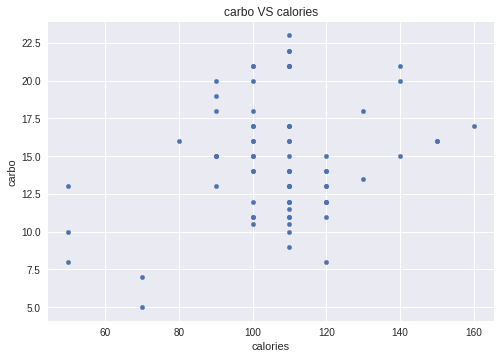

In [ ]:
df.plot(kind='scatter',x='calories',y='carbo',title='carbo VS calories')

#**11. Create a Bar Chart (barplot) with the distributors against the number of cereal that they distribute**

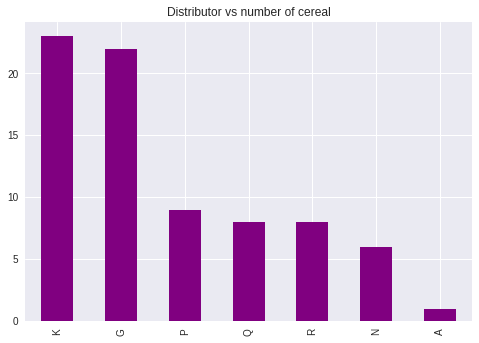

In [ ]:
df_rename['Distributor'].value_counts().plot(kind='bar', title='Distributor vs number of cereal',color='purple')

#**12.List the name of all objects found in the workspace**

In [ ]:
df.describe(include=object).columns

Index(['Cereal name', 'Supplier', 'Cold or Hot'], dtype='object')


#**13. Createa a vector called 'fat_amnt' with the data from the coloumn 'fat' and show :**
1. minimum
2. mean
3. maximum
**values**

In [ ]:
fat_amnt=df['fat'].to_numpy()
print('1. Minimum amount of fat =',fat_amnt.min())
print('2. Mean amount of fat =',fat_amnt.mean())
print('3. Maximum amount of fat =',fat_amnt.max())

1. Minimum amount of fat = 0
2. Mean amount of fat = 1.0129870129870129
3. Maximum amount of fat = 5


#**14.Write a function that takes three inputs parameters : 'mintCalories','maxCalories',and 'range'. Assuming range is a vector of numerical ids, the fuction will iterrate the records print the row if the calories of the cereal falls in the range 'minCalories' to 'maxCalories'.** *you need to use for loops and if statements*

In [11]:

def getCalories(minCal,maxCal,_range):  #define the function
  df_temp=pd.DataFrame()                #create temporary empty dataframe to store the row when we iterate through the rows
  df_cummulative=pd.DataFrame()         #create empty dataframe to append the df_temp
  for i in _range:                      #loop through the range or rows passed in the _range parameter
    if((df.loc[i,'calories']>=minCal)&(df.loc[i,'calories']<=maxCal)): #conditional statements
      df_temp=df.loc[i]                               #rows statisfied teh condition will be stored in the df_temp
      df_cummulative= df_cummulative.append(df_temp)  #value in df_temp is then append to df_cummulative
  return df_cummulative                               #eventually all the row that statisfy the condition will all be stored in the df_cummulative
                                                      #df_cummulative will be return to the function call


In [ ]:
_range=pd.Series(range(0,len(df)))    # create a vector of numerical ids, between 0 to len(df)
getCalories(0,50,_range[0:200])       # function getCalories is called
                                     



#**15 Test the above function by making at least 10 diffferent function calls**

In [ ]:
df.agg({                              # to check the max, min and median values of calories
    'calories':['max','min','median']
})

In [ ]:
import random                                       #importing random library
number_of_call=0                                    #initialise the number of call 
call=0                                              #and call to zero
while number_of_call<10:                            #loop then times
  minCal=random.randint(0,df['calories'].median())  #generating random number between 0 the median value in calories
  maxCal=random.randint(df['calories'].median(),df['calories'].max())        #generating random number between median and max in calories

  print(call+1,'function call')                                              #printing the number of call been made to the scree
  print('minCalories =',minCal,'|','MaxCalories =',maxCal)                   #printing the generated mincal and maxCal to the screen
  print(getCalories(minCal,maxCal,_range[0:len(df)])[['Cereal name','Supplier','calories']])  #set the range of rows from 0 to the end of the rows
                                                                                              #select only Cereal name, supplier and colories are to be displayed
  number_of_call+=1                                 #increase the number_of_call
  call+=1                                           # and call variable by one for every call
  print('\n\n\n')                                   # create spaces between every table print
